###**Problem Statement**

The project's main objective is to answer the question “How can sentiment analysis algorithms effectively process and interpret the nuanced emotions expressed in short-form tweets to improve ChatGPT’s response accuracy and enhance the user experience?".

In this project, we will analyze the sentiment of tweets to determine the public's overall sentiment toward ChatGPT’s performance. Additionally, we aim to analyze tweet patterns to identify underlying trends and patterns and determine potential general subjects of conversation in tweets.

###**Dictionary**



*  tweet_id: Unique identifier for a tweet.
*  tweet_created: Date and time when the tweet was created.
*  tweet_extracted: Date and time when the tweet was extracted or retrieved.
*  text: The actual text content of the tweet.
*  lang: Language in which the tweet is written.
*  user_id: Unique identifier for the user who posted the tweet.
*  user_name: Name of the user who posted the tweet.
*  user_username: Username or handle of the user who posted the tweet.
*  user_location: Location mentioned in the user's profile.
*  user_description: Description or bio provided by the user in their profile.
*  user_created: Date and time when the user's account was created.
*  user_followers_count: Number of followers the user has.
*  user_following_count: Number of accounts the user is following.
*  user_tweet_count: Total number of tweets posted by the user.
*  user_verified: Indicates whether the user's account is verified (True/False).
*  source: The source or platform from which the tweet was posted.
*  retweet_count: Number of times the tweet has been retweeted.
*  like_count: Number of times the tweet has been liked.
*  reply_count: Number of replies received by the tweet.
*  impression_count: Number of times the tweet has been seen or displayed.

###**Importing EDA and wrangling packages**

In [1]:
import pandas as pd

In [2]:
#Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading dataset
chatgpt_df = pd.read_csv("chatgpt_daily_tweets.csv")
chatgpt_df_list = []
chatgpt_df_list.append(chatgpt_df)

#Storing csv dataset into a dataframe
chatgtpt_df = pd.concat(chatgpt_df_list)

In [4]:
 chatgpt_df.columns

Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_name', 'user_username', 'user_location',
       'user_description', 'user_created', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified', 'source',
       'retweet_count', 'like_count', 'reply_count', 'impression_count'],
      dtype='object')

In [5]:
chatgpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41003 entries, 0 to 41002
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              41003 non-null  object 
 1   tweet_created         41003 non-null  object 
 2   tweet_extracted       41003 non-null  object 
 3   text                  41003 non-null  object 
 4   lang                  41003 non-null  object 
 5   user_id               41003 non-null  object 
 6   user_name             40998 non-null  object 
 7   user_username         41003 non-null  object 
 8   user_location         24345 non-null  object 
 9   user_description      34723 non-null  object 
 10  user_created          40998 non-null  object 
 11  user_followers_count  40995 non-null  float64
 12  user_following_count  40995 non-null  float64
 13  user_tweet_count      40995 non-null  float64
 14  user_verified         40995 non-null  object 
 15  source             

In [6]:
import dateutil.parser #library for parsing dates in various formats

#Converting Objects to Categorical attributes
chatgpt_df['text'] = chatgpt_df['text'].astype('str')

#Created a copy of the original dataset and then create two new columns in the copied dataset called original_tweet and datetime.
#The original_tweet column contains the original tweet text, while the datetime column contains the date and time of the tweet as a datetime object.
chatgpt_df['original_tweet'] = chatgpt_df['text']
chatgpt_df['datetime'] = chatgpt_df['tweet_created']

#Converting the datetime column from a string to a datetime object using the specified format string
chatgpt_df['datetime'] = chatgpt_df.datetime.apply(lambda x: dateutil.parser.parse(x))

#Created a boolean mask using the apply method and the lambda function to identify retweets.
rt_mask = chatgpt_df.text.apply(lambda x: "RT @" in x)


In [7]:
chatgpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41003 entries, 0 to 41002
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   tweet_id              41003 non-null  object                   
 1   tweet_created         41003 non-null  object                   
 2   tweet_extracted       41003 non-null  object                   
 3   text                  41003 non-null  object                   
 4   lang                  41003 non-null  object                   
 5   user_id               41003 non-null  object                   
 6   user_name             40998 non-null  object                   
 7   user_username         41003 non-null  object                   
 8   user_location         24345 non-null  object                   
 9   user_description      34723 non-null  object                   
 10  user_created          40998 non-null  object              

In [8]:
chatgpt_df.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,...,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count,original_tweet,datetime
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,...,445.0,87051.0,False,NaN,13640.0,0.0,0.0,0.0,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,2023-04-03 13:59:44+00:00
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,...,4941.0,76597.0,False,NaN,0.0,0.0,0.0,290.0,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,2023-04-03 10:59:22+00:00
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,...,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0,RT @DarrellLerner: ChatGPT Plugins are the fas...,2023-04-03 03:59:28+00:00
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,...,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0,Get an intelligent chatbot for your website in...,2023-04-03 15:59:59+00:00
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1311403370670960640,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,...,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",2023-04-03 01:59:25+00:00


###**Checking for unique values**

In [9]:
columns=chatgpt_df.columns
for c in columns:
    print(c,chatgpt_df[c].unique())
    print('_'*80)

tweet_id ['1.642889622681432e+18' '1.6428442314496123e+18' '1.6427385624866693e+18'
 ... '1656297990301032450' '1656433579478630400' '1656252554974736385']
________________________________________________________________________________
tweet_created ['2023-04-03 13:59:44+00:00' '2023-04-03 10:59:22+00:00'
 '2023-04-03 03:59:28+00:00' ... '2023-05-10 16:59:29+00:00'
 '2023-05-10 10:59:45+00:00' '2023-05-10 10:59:15+00:00']
________________________________________________________________________________
tweet_extracted ['2023-04-08 01:07:02.538242' '2023-04-08 01:06:59.379927'
 '2023-04-08 01:06:52.504868' '2023-04-08 01:07:04.742617'
 '2023-04-08 01:06:50.638068' '2023-04-08 01:07:00.375167'
 '2023-04-08 01:06:49.813797' '2023-04-08 01:07:10.575474'
 '2023-04-08 01:07:07.106068' '2023-04-08 01:07:01.437161'
 '2023-04-08 01:06:56.392561' '2023-04-08 01:07:05.916322'
 '2023-04-08 01:06:53.420410' '2023-04-08 01:07:08.324674'
 '2023-04-08 01:06:57.394551' '2023-04-08 01:07:09.392764'
 '20

###**Check null/missing values for each column**

In [10]:
missing_values = chatgpt_df.isna().any()

#Calculating the number of missing values for each column
num_missing_values = chatgpt_df.isna().sum()

#Combining the results into a new DataFrame
missing_values_df = pd.DataFrame({'Columns': missing_values.index, 'Missing Value T/F': missing_values, 'Num. of Missing Values': num_missing_values})

#Displaying the DataFrame with missing values information
print(missing_values_df)

                                   Columns  Missing Value T/F  \
tweet_id                          tweet_id              False   
tweet_created                tweet_created              False   
tweet_extracted            tweet_extracted              False   
text                                  text              False   
lang                                  lang              False   
user_id                            user_id              False   
user_name                        user_name               True   
user_username                user_username              False   
user_location                user_location               True   
user_description          user_description               True   
user_created                  user_created               True   
user_followers_count  user_followers_count               True   
user_following_count  user_following_count               True   
user_tweet_count          user_tweet_count               True   
user_verified            

We will be dropping the following from our dataset:
1. tweet_id - A unique identifier for the tweet. This is not directly relevant to sentiment analysis, so it can be dropped.
2. user_id, user_name, user_username: User-related identifiers. They are not directly relevant for sentiment analysis and can be dropped.
3. user_description - A description of the user. This can be dropped for tweet sentiment analysis since it isn't related to the tweet's sentiment.
5. source - We can't analyze  sentiment based on different platforms or devices given it was not provided in the dataset.
6. user_created and tweet_extracted - This can be dropped as it isn't directly relevant to sentiment analysis.
7. user_location - This might be relevant if we want to perform geospatial or regional sentiment analysis.


In [11]:
# Dropping the specified columns from the dataset
chatgpt_df = chatgpt_df.drop(columns=['tweet_id', 'user_location', 'tweet_extracted', 'user_created', 'user_id', 'user_name', 'user_username', 'user_description', 'source'], errors='ignore')

# Display the first few rows of the modified dataset to confirm
chatgpt_df.head()


,tweet_created,text,lang,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,original_tweet,datetime
0,2023-04-03 13:59:44+00:00,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,2023-04-03 13:59:44+00:00
1,2023-04-03 10:59:22+00:00,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,2023-04-03 10:59:22+00:00
2,2023-04-03 03:59:28+00:00,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,RT @DarrellLerner: ChatGPT Plugins are the fas...,2023-04-03 03:59:28+00:00
3,2023-04-03 15:59:59+00:00,Get an intelligent chatbot for your website in...,en,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,Get an intelligent chatbot for your website in...,2023-04-03 15:59:59+00:00
4,2023-04-03 01:59:25+00:00,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",2023-04-03 01:59:25+00:00


In [12]:
#Checking missing values after dropping columns

missing_values = chatgpt_df.isna().any()

#Calculating the number of missing values for each column
num_missing_values = chatgpt_df.isna().sum()

#Combining the results into a new DataFrame
missing_values_df = pd.DataFrame({'Columns': missing_values.index, 'Missing Value T/F': missing_values, 'Num. of Missing Values': num_missing_values})

#Displaying the DataFrame with missing values information
print(missing_values_df)

                                   Columns  Missing Value T/F  \
tweet_created                tweet_created              False   
text                                  text              False   
lang                                  lang              False   
user_followers_count  user_followers_count               True   
user_following_count  user_following_count               True   
user_tweet_count          user_tweet_count               True   
user_verified                user_verified               True   
retweet_count                retweet_count               True   
like_count                      like_count               True   
reply_count                    reply_count               True   
impression_count          impression_count               True   
original_tweet              original_tweet              False   
datetime                          datetime              False   

                      Num. of Missing Values  
tweet_created                             

In [13]:
#Checking Unique values in the 'lang' column
chatgpt_df['lang'].value_counts().nlargest(10)

en    19711
ja     9323
es     3905
zh     1449
fr     1438
pt     1039
th      616
tr      564
ar      543
de      360
Name: lang, dtype: int64

Under the 'lang'(Language) column:
1. en - English
2. ja - Japanese
3. es - Espanol/Spanish
4. zh - Chinese
5. fr - French
6. pt - Portugese
7. th - Thai
8. tr - Turkish
9. ar - Arabic
10. de - Deutsch

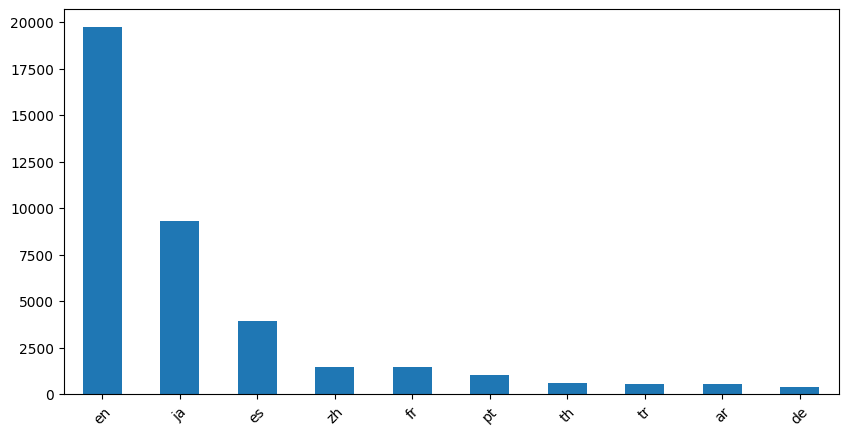

In [14]:
import matplotlib.pyplot as plt

#Plotting top 10 value_counts
plt.figure(figsize = (10,5))
chatgpt_df['lang'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation = 45)
plt.savefig("Lang.png")
plt.show()

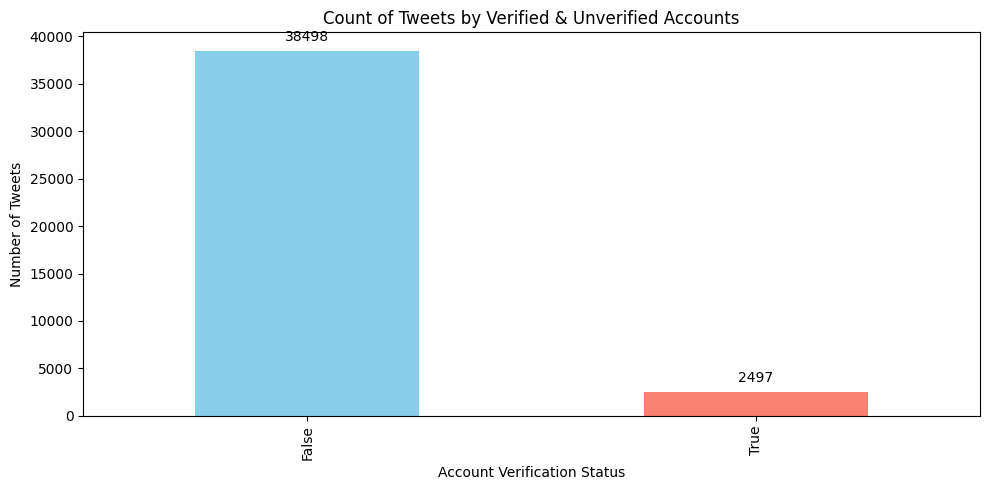

In [15]:
#plotting Count of Tweets by Verified & Unverified Accounts
plt.figure(figsize = (10,5))
ax = chatgpt_df['user_verified'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Count of Tweets by Verified & Unverified Accounts")
plt.ylabel("Number of Tweets")
plt.xlabel("Account Verification Status")

# Adding annotations for the exact counts without changing the original code
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.savefig("Verified Accounts.png")
plt.show()

**Text Analysis of Tweets**

In [16]:
!pip install neattext

  Using cached neattext-0.1.3-py3-none-any.whl (114 kB)


In [17]:
# Loading Text Cleaning Package
import neattext.functions as nfx

# Methods available in nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [18]:
#Filtering data on 'lang' column which is equal to 'en' (english)
chatgpt_lang_en = chatgpt_df[chatgpt_df['lang'] == 'en']

# Checking first 5 records in Tweet attribute
chatgpt_lang_en['text'].head(5)

2    RT @DarrellLerner: ChatGPT Plugins are the fas...
3    Get an intelligent chatbot for your website in...
4    🔥Hey Guys, #ZenithSwap has launched at just $ ...
5    RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...
9    The plagiarism detector will introduce its #AI...
Name: text, dtype: object

In [19]:
chatgpt_lang_en.isna().sum()

tweet_created           0
text                    0
lang                    0
user_followers_count    3
user_following_count    3
user_tweet_count        3
user_verified           3
retweet_count           3
like_count              3
reply_count             3
impression_count        3
original_tweet          0
datetime                0
dtype: int64

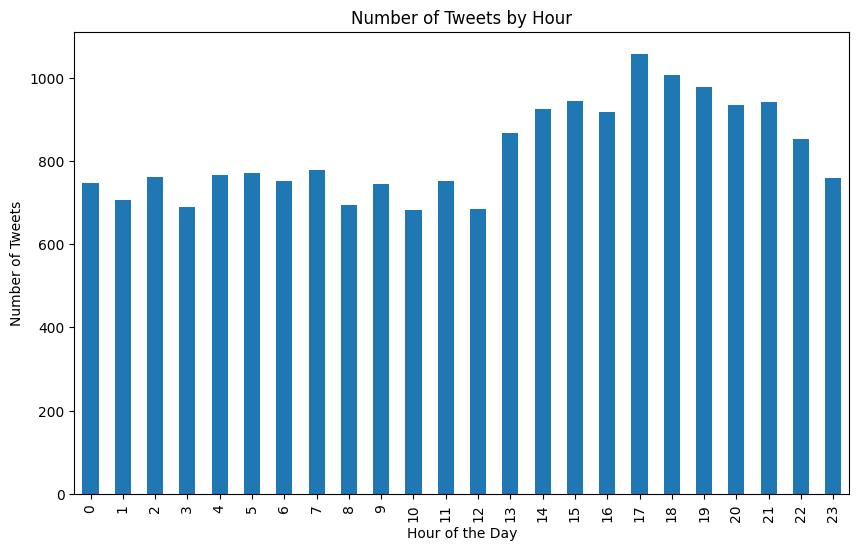

17

In [20]:
# Convert 'datetime' column to datetime format and extract the hour
chatgpt_lang_en['hour'] = pd.to_datetime(chatgpt_lang_en['datetime']).dt.hour

# Count the number of tweets for each hour
hourly_tweets = chatgpt_lang_en['hour'].value_counts().sort_index()

# Plot the hourly tweet counts
hourly_tweets.plot(kind='bar', figsize=(10,6))
plt.title("Number of Tweets by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.show()

# Determine which hour has the most tweets
most_tweeted_hour = hourly_tweets.idxmax()
most_tweeted_hour


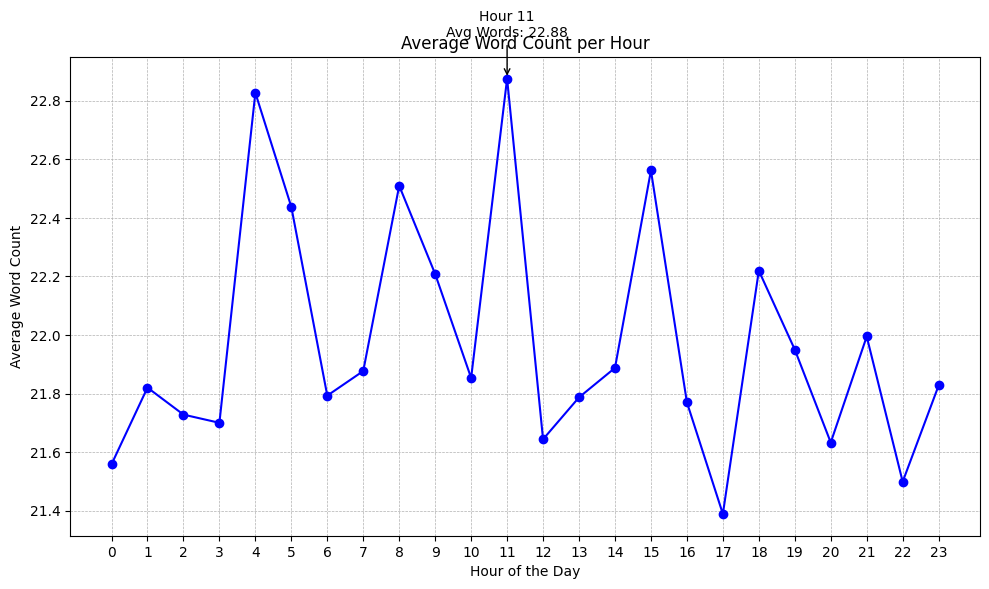

In [21]:
# Compute the word count for each sentence
chatgpt_lang_en['word_count'] = chatgpt_lang_en['text'].apply(lambda x: len(str(x).split()))

# Group by hour and compute average word count
average_word_count_per_hour = chatgpt_lang_en.groupby('hour')['word_count'].mean()

# Identify the hour with the highest average word count
max_hour = average_word_count_per_hour.idxmax()
max_value = average_word_count_per_hour.max()

# Plot the average word count per hour with annotations
plt.figure(figsize=(10, 6))
average_word_count_per_hour.plot(kind='line', marker='o', color='b')
plt.title("Average Word Count per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Word Count")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(0, 24))

# Annotate the hour with the highest average word count, adjusting position for visibility
plt.annotate(f"Hour {max_hour}\nAvg Words: {max_value:.2f}",
             (max_hour, max_value),
             textcoords="offset points",
             xytext=(0,30),
             ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()


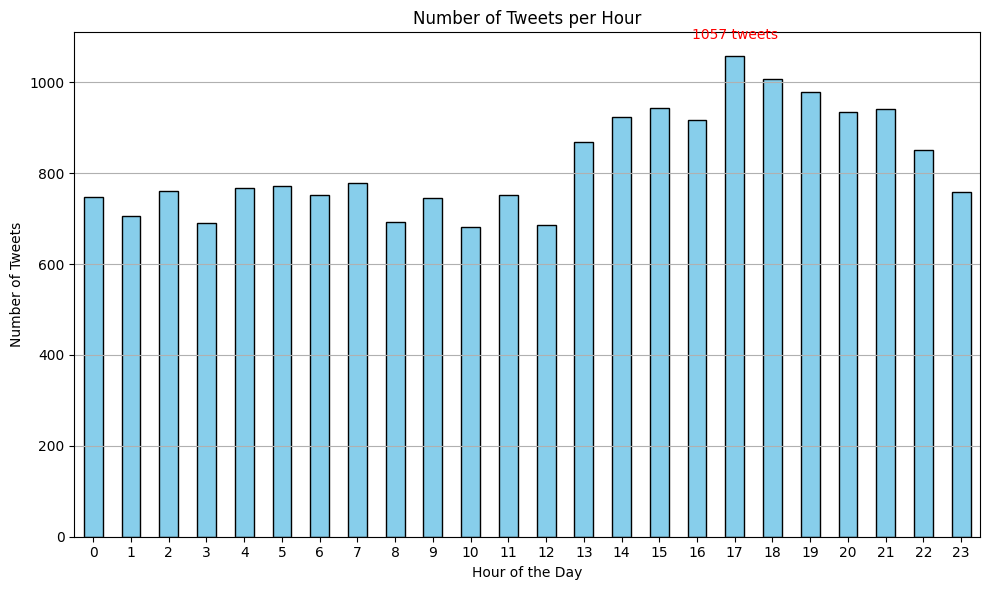

In [22]:
# Count the number of tweets per hour
tweets_per_hour = chatgpt_lang_en['hour'].value_counts().sort_index()

# Plot the number of tweets per hour
plt.figure(figsize=(10, 6))
tweets_per_hour.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Tweets per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.grid(axis='y')

# Annotate the hour with the most tweets
most_tweets_hour = tweets_per_hour.idxmax()
most_tweets_count = tweets_per_hour.max()
plt.annotate(f"{most_tweets_count} tweets",
             (most_tweets_hour, most_tweets_count),
             textcoords="offset points",
             xytext=(0,10),
             ha='center',
             va='bottom',
             fontsize=10,
             color='red')

plt.tight_layout()
plt.show()


In [23]:
#using fillna() method for null values
chatgpt_lang_en['user_followers_count'].fillna(0, inplace=True)
chatgpt_lang_en['user_following_count'].fillna(0, inplace=True)
chatgpt_lang_en['user_tweet_count'].fillna(0, inplace=True)
chatgpt_lang_en['user_verified'].fillna(0, inplace=True)
chatgpt_lang_en['retweet_count'].fillna(0, inplace=True)
chatgpt_lang_en['like_count'].fillna(0, inplace=True)
chatgpt_lang_en['reply_count'].fillna(0, inplace=True)
chatgpt_lang_en['impression_count'].fillna(0, inplace=True)


In [24]:
chatgpt_lang_en.isna().sum()


tweet_created           0
text                    0
lang                    0
user_followers_count    0
user_following_count    0
user_tweet_count        0
user_verified           0
retweet_count           0
like_count              0
reply_count             0
impression_count        0
original_tweet          0
datetime                0
hour                    0
word_count              0
dtype: int64

### **Noise**
+ remove mentions
+ remove hashtags
+ remove urls
+ remove extra spaces
+ remove emojis
+ remove special character
+ remove numbers

In [25]:
chatgpt_lang_en['text'][2:4]

4    🔥Hey Guys, #ZenithSwap has launched at just $ ...
5    RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...
Name: text, dtype: object

In [26]:
# Extracting hastags from Tweet attribute
chatgpt_lang_en['text'].apply(nfx.extract_hashtags)

2                                        []
3                                        []
4                  [#ZenithSwap, #Arbitrum]
5        [#SINSO, #Airdrop!, #ChatGPT&amp;]
9               [#AI, #ChatGPT, #academics]
                        ...                
40995                                    []
40996                                    []
40998                  [#YGPT, #Artificia…]
41000                                    []
41001                                    []
Name: text, Length: 19711, dtype: object

In [27]:
# Cleaning Text by removing hashtags and storing the results in Clean Tweet attribute
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['text'].apply(nfx.remove_hashtags)

In [28]:
chatgpt_lang_en['clean_tweet'].apply(nfx.extract_hashtags)

2        []
3        []
4        []
5        []
9        []
         ..
40995    []
40996    []
40998    []
41000    []
41001    []
Name: clean_tweet, Length: 19711, dtype: object

In [29]:
# Comparing Original Tweet and Cleaned Tweet
chatgpt_lang_en[['text','clean_tweet']][2:4]

,text,clean_tweet
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...","🔥Hey Guys, has launched at just $ 55,000 USD..."
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT @sinsonetwork: Now! Join DataLand^ChatGPT...


As a result, we no longer have any #Hashtag in Clean Tweet

In [30]:
# Removing mentions
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [31]:
# Comparing Original Tweet and Cleaned Tweet
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,RT ChatGPT Plugins are the fastest way to ge...
3,Get an intelligent chatbot for your website in...,Get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...","🔥Hey Guys, has launched at just $ 55,000 USD..."
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT Now! Join DataLand^ChatGPT \n📅3.23-4.6...
9,The plagiarism detector will introduce its #AI...,The plagiarism detector will introduce its d...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...","RT Hey everyone, have you heard about the ne..."
40996,Can ChatGPT write my SoHo House application? W...,Can ChatGPT write my SoHo House application? W...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,RT 🚀 YGPT LAUNCH 🚀\n\nTime to show you what ...
41000,RT @chatgpt_issac: Lets see which community is...,RT Lets see which community is bigger and I’...


As a result, we no longer have any @Mention in Clean Tweet

In [32]:
#remove white space
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [33]:
#extracting URLs from Tweets
list(filter(None,chatgpt_lang_en['text'].apply(nfx.extract_urls)))

[['https://t.co/yLHEqn4w9T', 'https://t.co/ba54JvoRsM'],
 ['https://t.co/9VWYtYzAJD'],
 ['https://t.co/Hlwqa7HG40&gt;'],
 ['https://t.co/pq7DB5r9An'],
 ['https://t.co/OS8DDsU2uD'],
 ['https://t.co/6Bl3e9Mlvx'],
 ['https://t.co/EVZyD7CfPi'],
 ['https://t.co/jximZe2qeG'],
 ['https://t.co/ScmvleWftQ'],
 ['https://t.co/hIO0wQFH1Y'],
 ['https://t.co/AhCfm3eO1g'],
 ['https://t.co/s7ihG9bBe2'],
 ['https://t.co/Me13yA0JOy'],
 ['https://t.co/hSAJ8PXZdW'],
 ['https://t.co/vSo4hTuSd9'],
 ['https://t.co/jximZe2qeG'],
 ['https://t.co/xUqSGPcVQd'],
 ['https://t.co/fXk1RX6Eon'],
 ['https://t.co/jximZe2qeG'],
 ['https://t.co/HhK7pzUOoa'],
 ['https://t.co/XdxqkuV6Lg'],
 ['https://t.co/fXk1RX6Eon'],
 ['https://t.co/EVZyD7CfPi'],
 ['https://t.co/eWLsdVy3Sm'],
 ['https://t.co/g0HtgdsG6B'],
 ['https://t.co/6IkdbHk1VB'],
 ['https://t.co/Hp1ycfEAyh'],
 ['https://t.co/nDcHOux1Sq'],
 ['https://t.co/r0cOEkyzp0', 'https://t.co/8Qkp27rhOJ'],
 ['https://t.co/mx1EWzW1AF'],
 ['https://t.co/rn3wDjdHAe'],
 ['https://t

In [34]:
#removing urls
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(nfx.remove_urls)

In [35]:
# Comparing Original Tweet and Cleaned Tweet after removing url
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,RT ChatGPT Plugins are the fastest way to get ...
3,Get an intelligent chatbot for your website in...,Get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...","🔥Hey Guys, has launched at just $ 55,000 USD M..."
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT Now! Join DataLand^ChatGPT 📅3.23-4.6\n📌Task...
9,The plagiarism detector will introduce its #AI...,The plagiarism detector will introduce its det...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...","RT Hey everyone, have you heard about the new ..."
40996,Can ChatGPT write my SoHo House application? W...,Can ChatGPT write my SoHo House application? W...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,RT 🚀 YGPT LAUNCH 🚀 Time to show you what we've...
41000,RT @chatgpt_issac: Lets see which community is...,RT Lets see which community is bigger and I’m ...


In [36]:
#removing punctuations(punctuations such as fullstop,comma,exclamation marks and question mark)
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(nfx.remove_puncts)

In [37]:
# Comparing Original Tweet and Cleaned Tweet after removing punctuations
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,RT ChatGPT Plugins are the fastest way to get ...
3,Get an intelligent chatbot for your website in...,Get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",🔥Hey Guys has launched at just $ 55000 USD Mar...
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT Now Join DataLand^ChatGPT 📅32346\n📌Tasks\n①...
9,The plagiarism detector will introduce its #AI...,The plagiarism detector will introduce its det...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...",RT Hey everyone have you heard about the new m...
40996,Can ChatGPT write my SoHo House application? W...,Can ChatGPT write my SoHo House application Wr...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,RT 🚀 YGPT LAUNCH 🚀 Time to show you what weve ...
41000,RT @chatgpt_issac: Lets see which community is...,RT Lets see which community is bigger and I’m ...


In [38]:
# Extracting Emojis from Tweets
chatgpt_lang_en['text'].apply(nfx.extract_emojis)

2                  []
3                  []
4             [🔥, 🔥😇]
5              [📅, 📌]
9                  []
             ...     
40995              []
40996              []
40998    [🚀, 🚀, ⚡, 👉]
41000              []
41001              []
Name: text, Length: 19711, dtype: object

In [39]:
# Checking Emojis in Clean Tweets
list(filter(None,chatgpt_lang_en['text'].apply(nfx.extract_emojis)))

[['🔥', '🔥😇'],
 ['📅', '📌'],
 ['👇'],
 ['😂'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🚨', '👇🏿'],
 ['🔥', '🔥😇'],
 ['😭'],
 ['😁'],
 ['🔥', '🔥😇'],
 ['💌'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['💡🚀'],
 ['🚨'],
 ['🔥', '🔥😇'],
 ['🙌'],
 ['📚'],
 ['🏻', '♂️'],
 ['😁'],
 ['🗺️'],
 ['🔥', '🔥😇'],
 ['😮'],
 ['🔥', '🔥😇'],
 ['📖', '♻️'],
 ['🎧'],
 ['💻'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['💰'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🚨', '🚨', '💰', '💰', '⬆️', '👇', '👇', '👇'],
 ['🔥', '🔥😇'],
 ['😁'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['💻'],
 ['😂😂💔'],
 ['🔥', '🔥😇'],
 ['😁'],
 ['🔥', '🔥😇'],
 ['♂️'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🚀🚀', '🚀🚀', '❇️'],
 ['🔥', '🔥😇'],
 ['🔹', '🔹', '🔹', '🔹', '🔹'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['👇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🇮🇹', '▪️', '▪️', '▪️'],
 ['📝'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🔥', '🔥😇'],
 ['🇮🇹', '▪️', '▪️', '▪️'],
 ['账号', '免翻搭建'],
 ['⬇️'],
 ['🔥', '🔥😇'],
 ['

In [40]:
#Removing Emojis by replacing unicode characters to '' using Regular Expression
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [41]:
# Comparing Original Tweet and Cleaned Tweet after replacing unicode characters
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,RT ChatGPT Plugins are the fastest way to get ...
3,Get an intelligent chatbot for your website in...,Get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",Hey Guys has launched at just $ 55000 USD Mark...
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT Now Join DataLand^ChatGPT 32346\nTasks\nLog...
9,The plagiarism detector will introduce its #AI...,The plagiarism detector will introduce its det...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...",RT Hey everyone have you heard about the new m...
40996,Can ChatGPT write my SoHo House application? W...,Can ChatGPT write my SoHo House application Wr...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,RT YGPT LAUNCH Time to show you what weve be...
41000,RT @chatgpt_issac: Lets see which community is...,RT Lets see which community is bigger and Im g...


In [42]:
# Removing special characters
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: nfx.remove_special_characters(x))

In [43]:
# Comparing Original Tweet and Cleaned Tweet after removing special characters
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,RT ChatGPT Plugins are the fastest way to get ...
3,Get an intelligent chatbot for your website in...,Get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",Hey Guys has launched at just 55000 USD Marke...
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT Now Join DataLandChatGPT 32346TasksLog in t...
9,The plagiarism detector will introduce its #AI...,The plagiarism detector will introduce its det...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...",RT Hey everyone have you heard about the new m...
40996,Can ChatGPT write my SoHo House application? W...,Can ChatGPT write my SoHo House application Wr...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,RT YGPT LAUNCH Time to show you what weve be...
41000,RT @chatgpt_issac: Lets see which community is...,RT Lets see which community is bigger and Im g...


In [44]:
#Replacing words to have more meaningful impact
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Cant','can not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('cant','can not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('didnt','did not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Didnt','did not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Shallnt','shall not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('shallnt','shall not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Shouldnt','should not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('shouldnt','should not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('dont','do not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Dont','do not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Couldnt','could not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('couldnt','could not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Doesnt','does not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('doesnt','does not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Willnt','will not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('willnt','will not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('Wouldnt','would not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('wouldnt','would not'))
chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(lambda x: x.replace('ive','i have'))

In [45]:
# Comparing Original Tweet and Cleaned Tweet after replacing words
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,RT ChatGPT Plugins are the fastest way to get ...
3,Get an intelligent chatbot for your website in...,Get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",Hey Guys has launched at just 55000 USD Marke...
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT Now Join DataLandChatGPT 32346TasksLog in t...
9,The plagiarism detector will introduce its #AI...,The plagiarism detector will introduce its det...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...",RT Hey everyone have you heard about the new m...
40996,Can ChatGPT write my SoHo House application? W...,Can ChatGPT write my SoHo House application Wr...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,RT YGPT LAUNCH Time to show you what weve be...
41000,RT @chatgpt_issac: Lets see which community is...,RT Lets see which community is bigger and Im g...


In [46]:
# Extracting Numbers from Tweets

chatgpt_lang_en['clean_tweet'].apply(nfx.extract_numbers)

2        [2023, 10]
3                []
4        [55000, 4]
5           [32346]
9                []
            ...    
40995            []
40996            []
40998            []
41000            []
41001            []
Name: clean_tweet, Length: 19711, dtype: object

In [47]:
# Removing numbers

chatgpt_lang_en['clean_tweet'] = chatgpt_lang_en['clean_tweet'].apply(nfx.remove_numbers)

In [48]:
# Checking Numbers from Clean_Tweets

chatgpt_lang_en['clean_tweet'].apply(nfx.extract_numbers)

2        []
3        []
4        []
5        []
9        []
         ..
40995    []
40996    []
40998    []
41000    []
41001    []
Name: clean_tweet, Length: 19711, dtype: object

In [49]:
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,RT ChatGPT Plugins are the fastest way to get ...
3,Get an intelligent chatbot for your website in...,Get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",Hey Guys has launched at just USD Marketcap ...
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,RT Now Join DataLandChatGPT TasksLog in toltTr...
9,The plagiarism detector will introduce its #AI...,The plagiarism detector will introduce its det...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...",RT Hey everyone have you heard about the new m...
40996,Can ChatGPT write my SoHo House application? W...,Can ChatGPT write my SoHo House application Wr...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,RT YGPT LAUNCH Time to show you what weve be...
41000,RT @chatgpt_issac: Lets see which community is...,RT Lets see which community is bigger and Im g...


In [50]:
#Changing to lower case for consistency and standardization
chatgpt_lang_en['clean_tweet']=chatgpt_lang_en['clean_tweet'].str.lower()

In [51]:
# Comparing Original Tweet and Cleaned Tweet after changing to lower case for consistency and standardization
chatgpt_lang_en[['text','clean_tweet']]

,text,clean_tweet
2,RT @DarrellLerner: ChatGPT Plugins are the fas...,rt chatgpt plugins are the fastest way to get ...
3,Get an intelligent chatbot for your website in...,get an intelligent chatbot for your website in...
4,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",hey guys has launched at just usd marketcap ...
5,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,rt now join datalandchatgpt taskslog in tolttr...
9,The plagiarism detector will introduce its #AI...,the plagiarism detector will introduce its det...
...,...,...
40995,"RT @solanaturbo: Hey everyone, have you heard ...",rt hey everyone have you heard about the new m...
40996,Can ChatGPT write my SoHo House application? W...,can chatgpt write my soho house application wr...
40998,RT @YGPT_official: 🚀 YGPT LAUNCH 🚀\n\nTime to ...,rt ygpt launch time to show you what weve be...
41000,RT @chatgpt_issac: Lets see which community is...,rt lets see which community is bigger and im g...


**Feature Extraction**

In [52]:
# Data visualization package

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [53]:
# Increasing width of columns to display 1000 characters

pd.options.display.max_colwidth = 1000

In [54]:
!pip install nltk

In [55]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

### Vader Lexicon

Valence Aware Dictionary for Sentiment Reasoning, or Vader, is a NLP algorithm that blended a sentiment lexicon approach as well as grammatical rules and syntactical conventions for expressing sentiment polarity and intensity. Vader is an open-sourced package within the Natural Language Toolkit (NLTK).

The lexicon approach means that this algorithm constructed a dictionary that contains a comprehensive list of sentiment features. This lexical dictionary does not only contain words, but also phrases (such as “bad ass” and “the bomb”), emoticons (such as “:-)”) and sentiment-laden acronyms (such as “ROFL” and “WTF”).

All the lexical features were rated for the polarity and intensity on a scale from “-4: Extremely Negative” to “+4 Extremely Positive” by 10 independent human raters. The average score is then used as the sentiment indicator for each lexical feature in the dictionary.

For example, in Vader, the word “okay” has a positive rating of 0.9, “good” is 1.9 and “great” is 3.1, whereas “horrible” is -2.5, the frowning emoticon “:(“ is -2.2, and “sucks” is -1.5. Vader’s lexicon dictionary contains around 7,500 sentiment features in total and any word not listed in the dictionary will be scored as “0: Neutral”.

![Alt text](https://miro.medium.com/max/1400/0*9oQJwaaWgjYbaw1S.png "")

In [56]:
chatgpt_lang_en.columns

Index(['tweet_created', 'text', 'lang', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified',
       'retweet_count', 'like_count', 'reply_count', 'impression_count',
       'original_tweet', 'datetime', 'hour', 'word_count', 'clean_tweet'],
      dtype='object')

In [57]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [58]:
sent_int_analyzer = SentimentIntensityAnalyzer()

In [59]:
chatgpt_lang_en['sentiment'] = chatgpt_lang_en['clean_tweet'].apply(lambda Tweet: sent_int_analyzer.polarity_scores(Tweet))
chatgpt_lang_en.head()

,tweet_created,text,lang,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,original_tweet,datetime,hour,word_count,clean_tweet,sentiment
2,2023-04-03 03:59:28+00:00,RT @DarrellLerner: ChatGPT Plugins are the fastest way to get rich in 2023. \n\nI’ve created a step-by-step guide showing you how to earn $10…,en,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,RT @DarrellLerner: ChatGPT Plugins are the fastest way to get rich in 2023. \n\nI’ve created a step-by-step guide showing you how to earn $10…,2023-04-03 03:59:28+00:00,3,24,rt chatgpt plugins are the fastest way to get rich in ive created a stepbystep guide showing you how to earn,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.6808}"
3,2023-04-03 15:59:59+00:00,Get an intelligent chatbot for your website in minutes with Chatbase AI. Train ChatGPT on your data and let it answer any question your users have. Simply upload a document or link and add the chat widget - it's that easy!\nMake Money using AI: https://t.co/yLHEqn4w9T https://t.co/ba54JvoRsM,en,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,Get an intelligent chatbot for your website in minutes with Chatbase AI. Train ChatGPT on your data and let it answer any question your users have. Simply upload a document or link and add the chat widget - it's that easy!\nMake Money using AI: https://t.co/yLHEqn4w9T https://t.co/ba54JvoRsM,2023-04-03 15:59:59+00:00,15,47,get an intelligent chatbot for your website in minutes with chatbase ai train chatgpt on your data and let it answer any question your users have simply upload a document or link and add the chat widget its that easymake money using ai,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.4588}"
4,2023-04-03 01:59:25+00:00,"🔥Hey Guys, #ZenithSwap has launched at just $ 55,000 USD Marketcap. The ChatGPT of DEX - Reimagining DeFi with AI-Powered Yield Farming. Now at 4X. Lot of up potential at such low marketcap.🔥😇 $ARB $ZSP #Arbitrum https://t.co/9VWYtYzAJD",en,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,"🔥Hey Guys, #ZenithSwap has launched at just $ 55,000 USD Marketcap. The ChatGPT of DEX - Reimagining DeFi with AI-Powered Yield Farming. Now at 4X. Lot of up potential at such low marketcap.🔥😇 $ARB $ZSP #Arbitrum https://t.co/9VWYtYzAJD",2023-04-03 01:59:25+00:00,1,37,hey guys has launched at just usd marketcap the chatgpt of dex reimagining defi with aipowered yield farming now at x lot of up potential at such low marketcap arb zsp,"{'neg': 0.066, 'neu': 0.886, 'pos': 0.047, 'compound': -0.1531}"
5,2023-04-03 11:59:28+00:00,RT @sinsonetwork: Now! Join #SINSO DataLand^ChatGPT #Airdrop!\n📅3.23-4.6\n📌Tasks\n①Log in to&lt;https://t.co/Hlwqa7HG40&gt;\n②Try SINSO #ChatGPT&amp; twe…,en,2286.0,982.0,20438.0,False,270.0,0.0,0.0,0.0,RT @sinsonetwork: Now! Join #SINSO DataLand^ChatGPT #Airdrop!\n📅3.23-4.6\n📌Tasks\n①Log in to&lt;https://t.co/Hlwqa7HG40&gt;\n②Try SINSO #ChatGPT&amp; twe…,2023-04-03 11:59:28+00:00,11,16,rt now join datalandchatgpt taskslog in tolttry sinso twe,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}"
9,2023-04-03 12:59:26+00:00,"The plagiarism detector will introduce its #AI detection tool tomorrow, hoping to protect academic integrity in a post-#ChatGPT world. \n\nThe speedy launch and lack of an opt-out have #academics worried.\n\nAn important piece @liamhknox for @insidehighered \n\nhttps://t.co/pq7DB5r9An",en,4444.0,1924.0,3320.0,True,7.0,22.0,1.0,5769.0,"The plagiarism detector will introduce its #AI detection tool tomorrow, hoping to protect academic integrity in a post-#ChatGPT world. \n\nThe speedy launch and lack of an opt-out have #academics worried.\n\nAn important piece @liamhknox for @insidehighered \n\nhttps://t.co/pq7DB5r9An",2023-04-03 12:59:26+00:00,12,37,the plagiarism detector will introduce its detection tool tomorrow hoping to protect academic integrity in a post world thespeedy launch and lack of an optout have worried an important piece for,

In [60]:
chatgpt_lang_en['sentiment'].head(10)

2        {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.6808}
3        {'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.4588}
4     {'neg': 0.066, 'neu': 0.886, 'pos': 0.047, 'compound': -0.1531}
5         {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}
9      {'neg': 0.117, 'neu': 0.627, 'pos': 0.256, 'compound': 0.6486}
10     {'neg': 0.163, 'neu': 0.688, 'pos': 0.15, 'compound': -0.0516}
11        {'neg': 0.172, 'neu': 0.656, 'pos': 0.172, 'compound': 0.0}
15       {'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8271}
16      {'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.5423}
17              {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Name: sentiment, dtype: object

In [61]:
chatgpt_lang_en['compound']  = chatgpt_lang_en['sentiment'].apply(lambda x : x['compound'])
chatgpt_lang_en['compound'].head(10)

2     0.6808
3     0.4588
4    -0.1531
5     0.2960
9     0.6486
10   -0.0516
11    0.0000
15    0.8271
16   -0.5423
17    0.0000
Name: compound, dtype: float64

In [62]:
chatgpt_lang_en['comp_score'] = chatgpt_lang_en['compound'].apply(lambda c: 'pos' if c > 0 else ('neu' if c == 0 else 'neg'))

chatgpt_lang_en[['clean_tweet','sentiment','compound','comp_score']].head(5)



,clean_tweet,sentiment,compound,comp_score
2,rt chatgpt plugins are the fastest way to get rich in ive created a stepbystep guide showing you how to earn,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.6808}",0.6808,pos
3,get an intelligent chatbot for your website in minutes with chatbase ai train chatgpt on your data and let it answer any question your users have simply upload a document or link and add the chat widget its that easymake money using ai,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.4588}",0.4588,pos
4,hey guys has launched at just usd marketcap the chatgpt of dex reimagining defi with aipowered yield farming now at x lot of up potential at such low marketcap arb zsp,"{'neg': 0.066, 'neu': 0.886, 'pos': 0.047, 'compound': -0.1531}",-0.1531,neg
5,rt now join datalandchatgpt taskslog in tolttry sinso twe,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}",0.2960,pos
9,the plagiarism detector will introduce its detection tool tomorrow hoping to protect academic integrity in a post world thespeedy launch and lack of an optout have worried an important piece for,"{'neg': 0.117, 'neu': 0.627, 'pos': 0.256, 'compound': 0.6486}",0.6486,pos


In [63]:
filter_rows = chatgpt_lang_en[chatgpt_lang_en['comp_score'] == 'pos'][['clean_tweet','sentiment','compound','comp_score']]
filter_rows.head(5)

,clean_tweet,sentiment,compound,comp_score
2,rt chatgpt plugins are the fastest way to get rich in ive created a stepbystep guide showing you how to earn,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.6808}",0.6808,pos
3,get an intelligent chatbot for your website in minutes with chatbase ai train chatgpt on your data and let it answer any question your users have simply upload a document or link and add the chat widget its that easymake money using ai,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.4588}",0.4588,pos
5,rt now join datalandchatgpt taskslog in tolttry sinso twe,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}",0.2960,pos
9,the plagiarism detector will introduce its detection tool tomorrow hoping to protect academic integrity in a post world thespeedy launch and lack of an optout have worried an important piece for,"{'neg': 0.117, 'neu': 0.627, 'pos': 0.256, 'compound': 0.6486}",0.6486,pos
15,rt these guys asked chatgpt how to win a valorant game and got their opponent to surrender lmao,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8271}",0.8271,pos


In [64]:
chatgpt_lang_en.shape

(19711, 19)

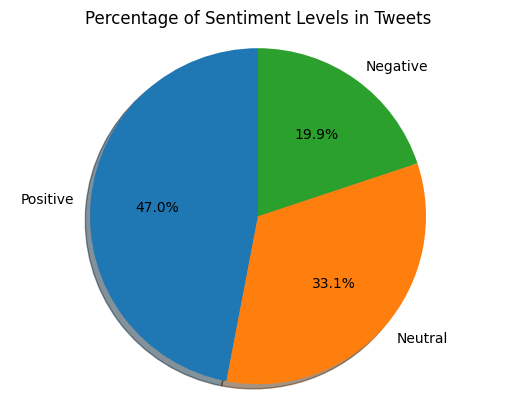

In [65]:
# Creating a pie chart of comp_score

fig1, ax1 = plt.subplots()
ax1.pie(chatgpt_lang_en['comp_score'].value_counts().values, labels = ['Positive', 'Neutral','Negative'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text("Percentage of Sentiment Levels in Tweets")
ax1.axis('equal')
plt.savefig("comp_score_pie.png")

In [66]:
chatgpt_lang_en['comp_score'].value_counts()

pos    9262
neu    6528
neg    3921
Name: comp_score, dtype: int64

In [67]:
chatgpt_lang_en.to_csv("Processed_Output.csv",index = False)

Keyword Extraction

For Positive, Neutral and Negative Sentiment

In [68]:
chatgpt_lang_en.columns

Index(['tweet_created', 'text', 'lang', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified',
       'retweet_count', 'like_count', 'reply_count', 'impression_count',
       'original_tweet', 'datetime', 'hour', 'word_count', 'clean_tweet',
       'sentiment', 'compound', 'comp_score'],
      dtype='object')

In [69]:
chatgpt_lang_en['comp_score']

2        pos
3        pos
4        neg
5        pos
9        pos
        ... 
40995    neu
40996    pos
40998    pos
41000    pos
41001    neu
Name: comp_score, Length: 19711, dtype: object

In [70]:
chatgpt_lang_en['comp_score'] == 'pos'

2         True
3         True
4        False
5         True
9         True
         ...  
40995    False
40996     True
40998     True
41000     True
41001    False
Name: comp_score, Length: 19711, dtype: bool

In [71]:
chatgpt_lang_en.loc[chatgpt_lang_en['comp_score'] == 'pos','clean_tweet']

2                                                                                                                                        rt chatgpt plugins are the fastest way to get rich in  ive created a stepbystep guide showing you how to earn 
3        get an intelligent chatbot for your website in minutes with chatbase ai train chatgpt on your data and let it answer any question your users have simply upload a document or link and add the chat widget  its that easymake money using ai  
5                                                                                                                                                                                             rt now join datalandchatgpt taskslog in tolttry sinso twe
9                                                   the plagiarism detector will introduce its detection tool tomorrow hoping to protect academic integrity in a post world thespeedy launch and lack of an optout have worried an important piece for 
15      

In [72]:
positive_tweet = chatgpt_lang_en.loc[chatgpt_lang_en['comp_score'] == 'pos','clean_tweet']

In [73]:
neutral_tweet = chatgpt_lang_en.loc[chatgpt_lang_en['comp_score'] == 'neu','clean_tweet']

In [74]:
negative_tweet = chatgpt_lang_en.loc[chatgpt_lang_en['comp_score'] == 'neg','clean_tweet']

In [75]:
positive_tweet

2                                                                                                                                        rt chatgpt plugins are the fastest way to get rich in  ive created a stepbystep guide showing you how to earn 
3        get an intelligent chatbot for your website in minutes with chatbase ai train chatgpt on your data and let it answer any question your users have simply upload a document or link and add the chat widget  its that easymake money using ai  
5                                                                                                                                                                                             rt now join datalandchatgpt taskslog in tolttry sinso twe
9                                                   the plagiarism detector will introduce its detection tool tomorrow hoping to protect academic integrity in a post world thespeedy launch and lack of an optout have worried an important piece for 
15      

In [76]:
# Importing Neattext library

import neattext as nfx

In [77]:
positive_tweet[0:1]

2    rt chatgpt plugins are the fastest way to get rich in  ive created a stepbystep guide showing you how to earn 
Name: clean_tweet, dtype: object

In [78]:
#Remove stopwords
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords)
positive_tweet[0:1]

2    rt chatgpt plugins are the fastest way to get rich in  ive created a stepbystep guide showing you how to earn 
Name: clean_tweet, dtype: object

In [79]:
positive_tweet_list.dtypes

dtype('O')

Tokenization

Word tokenization is the process of splitting a large sample of text into words. This is a requirement in natural language processing tasks where each word needs to be captured and subjected to further analysis like classifying and counting them for a particular sentiment etc.

In [80]:
# convert to tokens
positive_tweet_list = positive_tweet_list.tolist()

In [81]:
positive_tweet_list

['rt chatgpt plugins fastest way rich ive created stepbystep guide showing earn',
 'intelligent chatbot website minutes chatbase ai train chatgpt data let answer question users simply upload document link add chat widget easymake money ai',
 'rt join datalandchatgpt taskslog tolttry sinso twe',
 'plagiarism detector introduce detection tool tomorrow hoping protect academic integrity post world thespeedy launch lack optout worried important piece',
 'rt guys asked chatgpt win valorant game got opponent surrender lmao',
 'reminder gpt astonishingly powerful somewhat brittle came tried midjourneystyle emphasis thread heres adding hyperbolic words extremely superbly greatly important prompt able',
 'rt pro tip greatly increase gpts effecti context size asking compress prompts abbr',
 'rt airdrop alert follow amp like rttag friendsdrop solana wallet send',
 'words genesis bible strip wokeness rewrite students outcome media literacy class gptin beginning uni haverse came existence vast expan

In [82]:
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [83]:
neutral_tweet_list[0:2]

['rt chatgpt gt fud guy ai knows',
 'rt asked new chatgpt browsing extension find money minute way bank account']

In [84]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()

In [85]:
negative_tweet_list[0:2]

['hey guys launched usd marketcap chatgpt dex reimagining defi aipowered yield farming x lot potential low marketcap arb zsp',
 'germany follow italys footsteps blocking chatgpt data security concerns']

In [86]:
positive_tweet_list[0:5]

['rt chatgpt plugins fastest way rich ive created stepbystep guide showing earn',
 'intelligent chatbot website minutes chatbase ai train chatgpt data let answer question users simply upload document link add chat widget easymake money ai',
 'rt join datalandchatgpt taskslog tolttry sinso twe',
 'plagiarism detector introduce detection tool tomorrow hoping protect academic integrity post world thespeedy launch lack optout worried important piece',
 'rt guys asked chatgpt win valorant game got opponent surrender lmao']

In [87]:
# Tokenization

pos_tokens = []
for e in positive_tweet_list:
    print(e)
    for token in e.split():
        pos_tokens.append(token)

Streaming output truncated to the last 5000 lines.
happening shortly hope
reads like chatgpt fic
rt chatgpt prompts thatll save mental energy ranked
rt chatgpt great theres better ai tools heres mindblowing ai websites thatll work
rt powered future amazing returns day plan fast return
rt best chatgpt prompts finish hours work secondsall new
rt twitter space starts join discussion technologies relates sec
rt chatgpt good search investigating large language models reranking agent finds properly instructed cha
rt chatgpt says im standing best emcees time lol
rt software developers love new ai tool like chatgpt code understands codebases gpt
nah b chatgpt learn dlts fkn clown amazing
talking chatgpt democratic party
rt fantastic ai tools entrepreneurs web chatgpt midjourney canva fireflies ai sheetai tome
rt heres intuiti explanation training lots lots data creates emergent properties instance mat
especially like chatgpt makes packages
wrote movie script lotr featuring main character lol b

In [88]:
pos_tokens


['rt',
 'chatgpt',
 'plugins',
 'fastest',
 'way',
 'rich',
 'ive',
 'created',
 'stepbystep',
 'guide',
 'showing',
 'earn',
 'intelligent',
 'chatbot',
 'website',
 'minutes',
 'chatbase',
 'ai',
 'train',
 'chatgpt',
 'data',
 'let',
 'answer',
 'question',
 'users',
 'simply',
 'upload',
 'document',
 'link',
 'add',
 'chat',
 'widget',
 'easymake',
 'money',
 'ai',
 'rt',
 'join',
 'datalandchatgpt',
 'taskslog',
 'tolttry',
 'sinso',
 'twe',
 'plagiarism',
 'detector',
 'introduce',
 'detection',
 'tool',
 'tomorrow',
 'hoping',
 'protect',
 'academic',
 'integrity',
 'post',
 'world',
 'thespeedy',
 'launch',
 'lack',
 'optout',
 'worried',
 'important',
 'piece',
 'rt',
 'guys',
 'asked',
 'chatgpt',
 'win',
 'valorant',
 'game',
 'got',
 'opponent',
 'surrender',
 'lmao',
 'reminder',
 'gpt',
 'astonishingly',
 'powerful',
 'somewhat',
 'brittle',
 'came',
 'tried',
 'midjourneystyle',
 'emphasis',
 'thread',
 'heres',
 'adding',
 'hyperbolic',
 'words',
 'extremely',
 'superb

In [89]:
# Get most common Keyword

from collections import Counter

In [90]:
def get_tokens(docx,num = 30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [91]:
get_tokens(pos_tokens)

{'chatgpt': 6866,
 'rt': 5847,
 'ai': 2691,
 'like': 841,
 'use': 813,
 'free': 785,
 'tools': 776,
 'new': 683,
 'prompts': 653,
 'best': 528,
 'gpt': 504,
 'amp': 473,
 'people': 468,
 'help': 391,
 'powerful': 364,
 'write': 364,
 'code': 362,
 'create': 357,
 'work': 344,
 'know': 338,
 'good': 330,
 'time': 306,
 'prompt': 297,
 'hours': 288,
 'better': 287,
 'gi': 281,
 'im': 263,
 'token': 259,
 'ive': 251,
 'want': 242}

In [92]:
# Tokenization

neu_tokens = []
for e in neutral_tweet_list:
    print(e)
    for token in e.split():
        neu_tokens.append(token)

Streaming output truncated to the last 5000 lines.
rt domain available purchase dm details
happens chatgpt starts feed writing
rt chatgpt plugin quick start clone install requirements run plugin
startup idea version chatgpt exclusi havely sexual things called chatgspotpt
yo gotta check web developers mev strategy key making major bank crypto
rt chatgpt plugin quick start clone install requirements run plugin
rt asked chatgpt thoughts premiership rugby
rt chatgpt future built ultimate gpt mastery course chapters new gpt prompts new
premium account netflixgrammarlyspotifybartleby learnquillbotyoutubecanva lifetimecanva propicsart goldviuiwant tfcdisney plus phturnitindiscord bot inunlockcourseherocheggbartlebyscribdchatgpt nhytyt
nevada april job fairs chatgpt hr primer hr professionals
word day prosethic knowledge
rt million people use chatgpt fewer understand mega thread speed
rt industry leaders question replace employees chatgpt purchasing
rt million people use chatgpt fewer understa

In [93]:
neu_tokens

['rt',
 'chatgpt',
 'gt',
 'fud',
 'guy',
 'ai',
 'knows',
 'rt',
 'asked',
 'new',
 'chatgpt',
 'browsing',
 'extension',
 'find',
 'money',
 'minute',
 'way',
 'bank',
 'account',
 'rt',
 'graphics',
 'ai',
 'rt',
 'pov',
 'youre',
 'chatgpt',
 'rt',
 'listing',
 'exchange',
 'sushiswap',
 'pm',
 'utc',
 'zenithswap',
 'chatgpt',
 'dexreimagining',
 'decentralized',
 'rt',
 'asked',
 'new',
 'chatgpt',
 'browsing',
 'extension',
 'find',
 'money',
 'minute',
 'way',
 'bank',
 'account',
 'rt',
 'asked',
 'chatgpt',
 'write',
 'post',
 'griffin',
 'ramp',
 'vibration',
 'tests',
 'witnessed',
 'space',
 'structure',
 'vibration',
 'test',
 'rt',
 'rip',
 'chatgpt',
 'rt',
 'rise',
 'developer',
 'aeya',
 'premium',
 'accounts',
 'netflix',
 'warrantygrammarlyspotifybartleby',
 'learnquillbotyoutubecanva',
 'lifetimecanva',
 'propicsart',
 'goldviuiwant',
 'tfcdisney',
 'plus',
 'phturnitindiscord',
 'bot',
 'inunlockcourseherocheggbartlebyscribdchatgptnhjkh',
 'beat',
 'rt',
 'chatgpt

In [94]:
# Tokenization

neg_tokens = []
for e in negative_tweet_list:
    print(e)
    for token in e.split():
        neg_tokens.append(token)

hey guys launched usd marketcap chatgpt dex reimagining defi aipowered yield farming x lot potential low marketcap arb zsp
germany follow italys footsteps blocking chatgpt data security concerns
rt hooked chatgpt furby think start bad humanity
hey guys launched usd marketcap chatgpt dex reimagining defi aipowered yield farming x lot potential low marketcap arb zsp
hey guys launched usd marketcap chatgpt dex reimagining defi aipowered yield farming x lot potential low marketcap arb zsp
hey guys launched usd marketcap chatgpt dex reimagining defi aipowered yield farming x lot potential low marketcap arb zsp
rt hooked chatgpt furby think start bad humanity
rt hooked chatgpt furby think start bad humanity
hey guys launched usd marketcap chatgpt dex reimagining defi aipowered yield farming x lot potential low marketcap arb zsp
asked chatgpt generate list topics addressed book topic im writing suggest couple topics missed added outline
hey guys launched usd marketcap chatgpt dex reimagining 

In [95]:
neg_tokens


['hey',
 'guys',
 'launched',
 'usd',
 'marketcap',
 'chatgpt',
 'dex',
 'reimagining',
 'defi',
 'aipowered',
 'yield',
 'farming',
 'x',
 'lot',
 'potential',
 'low',
 'marketcap',
 'arb',
 'zsp',
 'germany',
 'follow',
 'italys',
 'footsteps',
 'blocking',
 'chatgpt',
 'data',
 'security',
 'concerns',
 'rt',
 'hooked',
 'chatgpt',
 'furby',
 'think',
 'start',
 'bad',
 'humanity',
 'hey',
 'guys',
 'launched',
 'usd',
 'marketcap',
 'chatgpt',
 'dex',
 'reimagining',
 'defi',
 'aipowered',
 'yield',
 'farming',
 'x',
 'lot',
 'potential',
 'low',
 'marketcap',
 'arb',
 'zsp',
 'hey',
 'guys',
 'launched',
 'usd',
 'marketcap',
 'chatgpt',
 'dex',
 'reimagining',
 'defi',
 'aipowered',
 'yield',
 'farming',
 'x',
 'lot',
 'potential',
 'low',
 'marketcap',
 'arb',
 'zsp',
 'hey',
 'guys',
 'launched',
 'usd',
 'marketcap',
 'chatgpt',
 'dex',
 'reimagining',
 'defi',
 'aipowered',
 'yield',
 'farming',
 'x',
 'lot',
 'potential',
 'low',
 'marketcap',
 'arb',
 'zsp',
 'rt',
 'hooked

In [96]:
# Getting top 30 most common words for each sentiment

most_common_pos_words = get_tokens(pos_tokens)
most_common_neu_words = get_tokens(neu_tokens)
most_common_neg_words = get_tokens(neg_tokens)

In [97]:
most_common_pos_words

{'chatgpt': 6866,
 'rt': 5847,
 'ai': 2691,
 'like': 841,
 'use': 813,
 'free': 785,
 'tools': 776,
 'new': 683,
 'prompts': 653,
 'best': 528,
 'gpt': 504,
 'amp': 473,
 'people': 468,
 'help': 391,
 'powerful': 364,
 'write': 364,
 'code': 362,
 'create': 357,
 'work': 344,
 'know': 338,
 'good': 330,
 'time': 306,
 'prompt': 297,
 'hours': 288,
 'better': 287,
 'gi': 281,
 'im': 263,
 'token': 259,
 'ive': 251,
 'want': 242}

In [98]:
most_common_neg_words.items()

dict_items([('chatgpt', 3201), ('rt', 2522), ('ai', 1229), ('use', 642), ('people', 419), ('marketcap', 244), ('stop', 244), ('im', 241), ('new', 226), ('gpt', 221), ('know', 214), ('fake', 205), ('like', 194), ('potential', 191), ('ways', 184), ('launched', 170), ('tools', 166), ('time', 157), ('lot', 152), ('chrome', 150), ('academic', 143), ('low', 142), ('start', 142), ('asked', 142), ('heres', 138), ('citations', 138), ('write', 136), ('hey', 134), ('guys', 131), ('aipowered', 130)])

In [99]:
pd.DataFrame(most_common_neg_words.items(),columns = ["words","score"])

,words,score
0,chatgpt,3201
1,rt,2522
2,ai,1229
3,use,642
4,people,419
5,marketcap,244
6,stop,244
7,im,241
8,new,226
9,gpt,221


In [100]:
# Creating dataframe of most common negative words and assigning score as number of times it appeared

neg_df = pd.DataFrame(most_common_neg_words.items(), columns = ['words', 'score'])

In [101]:
neg_df

,words,score
0,chatgpt,3201
1,rt,2522
2,ai,1229
3,use,642
4,people,419
5,marketcap,244
6,stop,244
7,im,241
8,new,226
9,gpt,221


In [102]:
neg_df.to_csv("neg_df.csv")

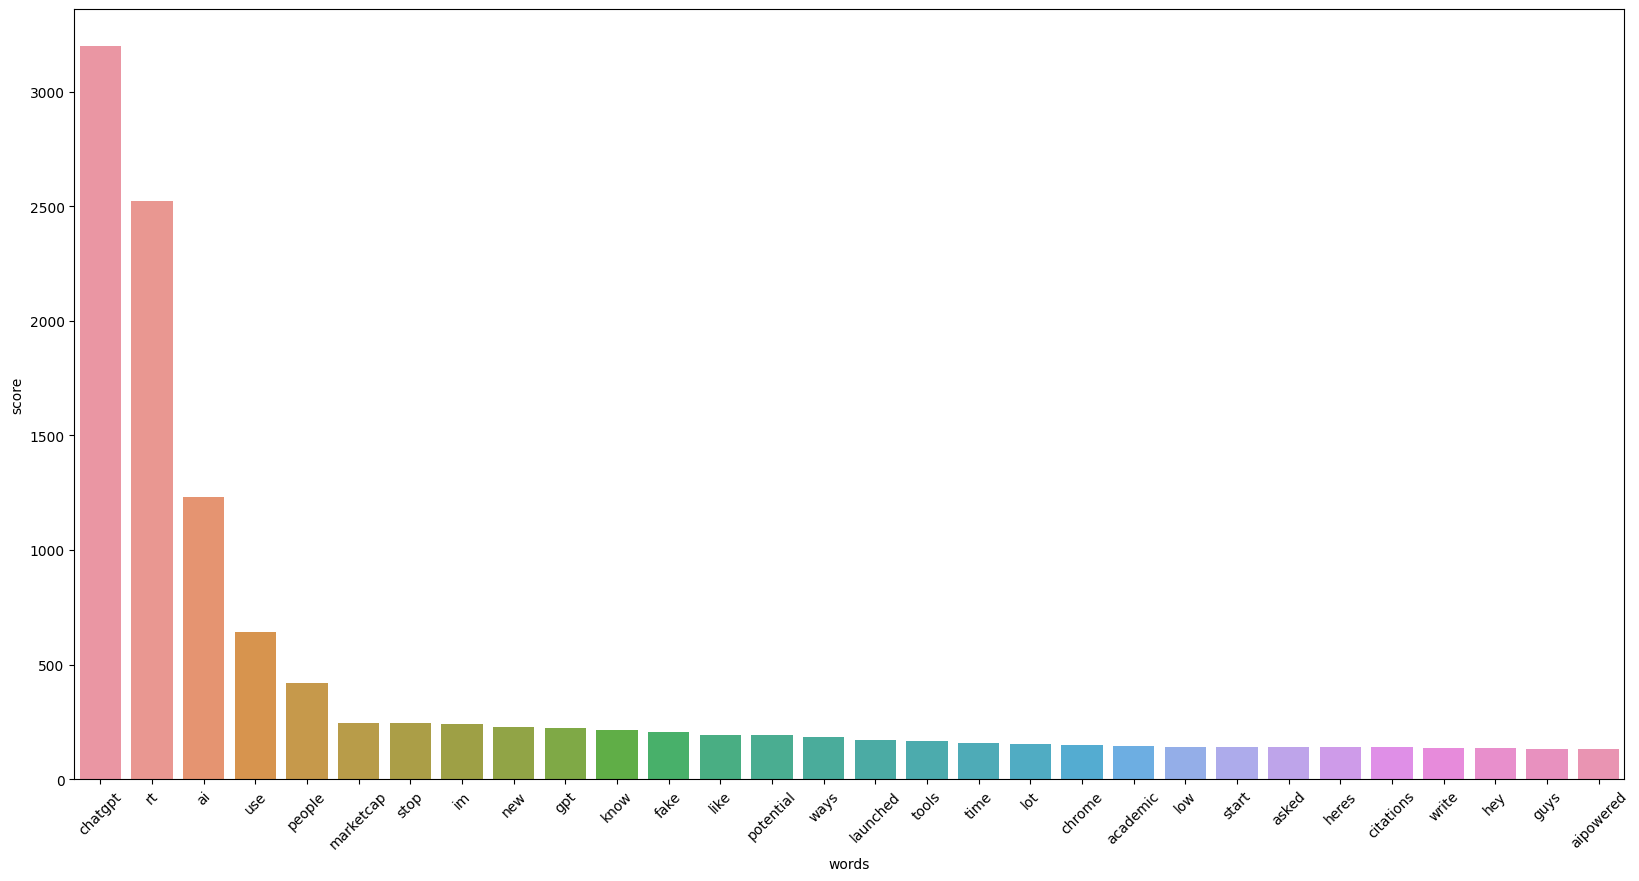

In [103]:
# Plotting a bar plot of most common words

plt.figure(figsize = (20,10))
sns.barplot(x = 'words', y = 'score', data = neg_df)
plt.xticks(rotation = 45)
plt.savefig("most_common_neg.png")
plt.show()

In [104]:
pos_df = pd.DataFrame(most_common_pos_words.items(), columns = ['words', 'score'])
pos_df

,words,score
0,chatgpt,6866
1,rt,5847
2,ai,2691
3,like,841
4,use,813
5,free,785
6,tools,776
7,new,683
8,prompts,653
9,best,528


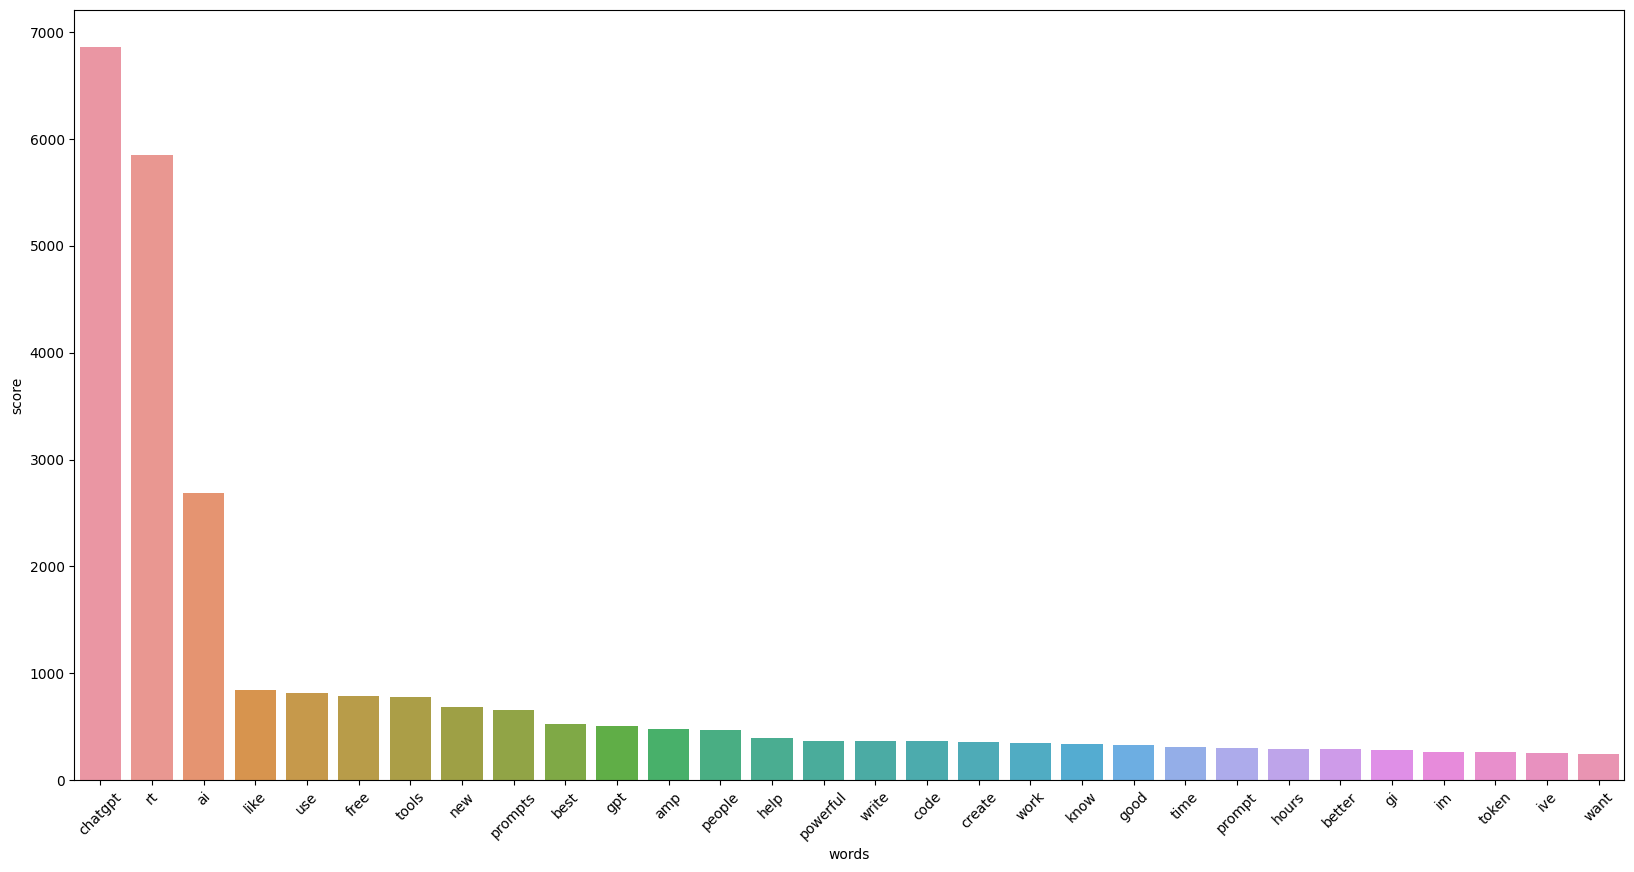

In [105]:
# Plotting a bar plot of most common words

plt.figure(figsize = (20,10))
sns.barplot(x = 'words', y = 'score', data = pos_df)
plt.xticks(rotation = 45)
plt.savefig("most_common_pos.png")
plt.show()

In [106]:
neu_df = pd.DataFrame(most_common_neu_words.items(), columns = ['words', 'score'])
neu_df

,words,score
0,rt,4664
1,chatgpt,4449
2,ai,1465
3,premium,403
4,use,393
5,new,380
6,amp,362
7,gpt,297
8,account,277
9,hours,247


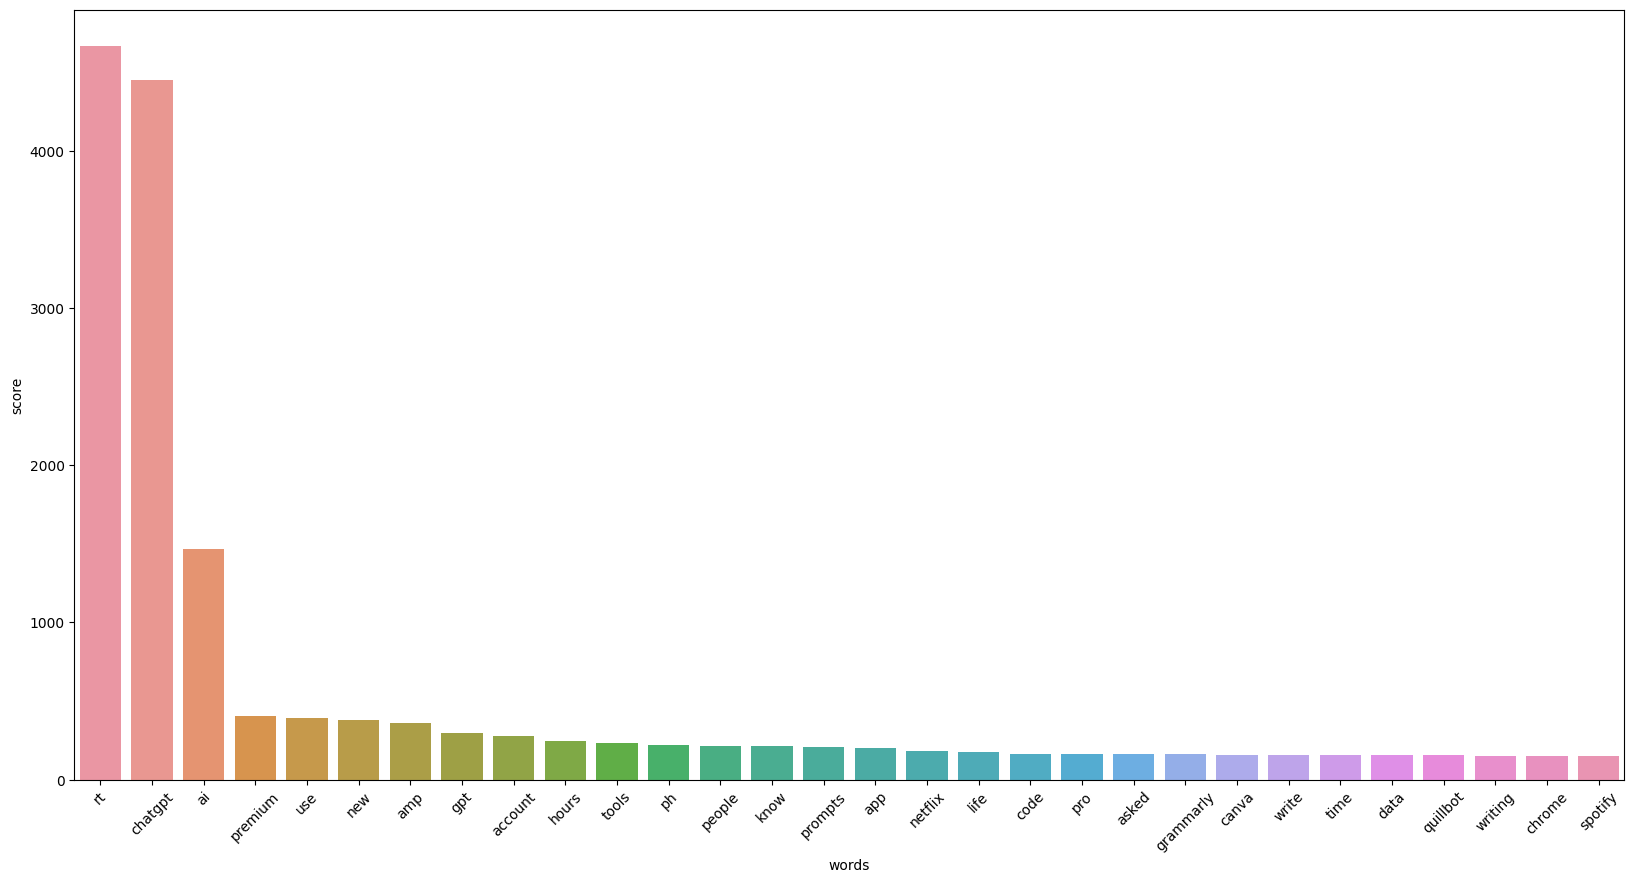

In [107]:
# Plotting a bar plot of most common words

plt.figure(figsize = (20,10))
sns.barplot(x = 'words', y = 'score', data = neu_df)
plt.xticks(rotation = 45)
plt.savefig("most_common_neu.png")
plt.show()

In [108]:
pip install wordcloud

In [109]:
#Importing Wordcloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS = STOPWORDS.update(["amp", "1", "7", "|", "202220144:", "RT", "Chatgpt"]) #Added RT and chatgpt

In [110]:
import numpy as np

In [111]:
pos_tokens[0:5]

['rt', 'chatgpt', 'plugins', 'fastest', 'way']

In [112]:
' '.join(pos_tokens[0:5])

'rt chatgpt plugins fastest way'

In [113]:
# Adding a white speace between tokens to avoid them to merge into each other

pos_docx = ' '.join(pos_tokens)
neu_docx = ' '.join(neu_tokens)
neg_docx = ' '.join(neg_tokens)

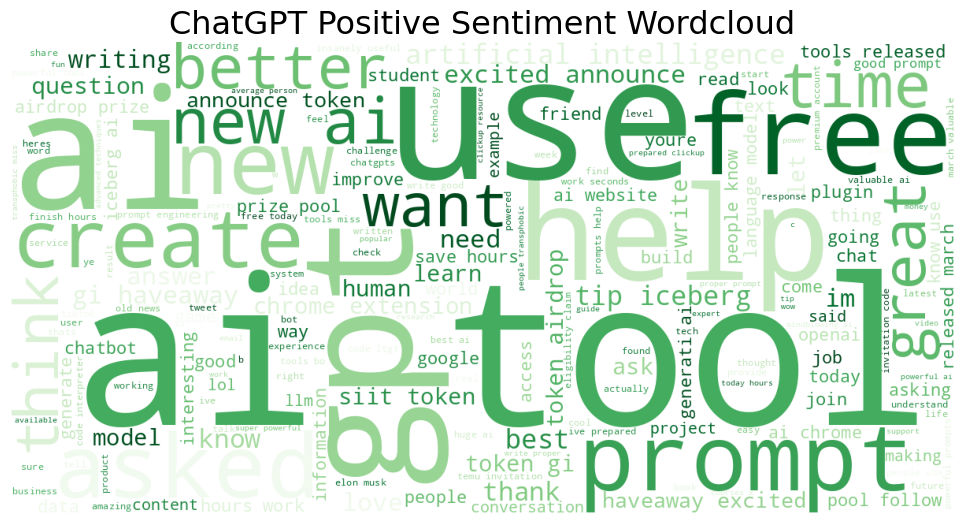

In [114]:
# Positive Sentiment Wordcloud #change title
pos_wordcloud = WordCloud(width=1200, height=600,
            background_color='white',
            colormap="Greens",
            stopwords=STOPWORDS,
            min_font_size=10).generate(pos_docx)
plt.figure(figsize=(10,6), facecolor='white')
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.tight_layout(pad=2)
plt.title('ChatGPT Positive Sentiment Wordcloud',fontsize=23)
plt.savefig("pos_wc.png")
plt.show()

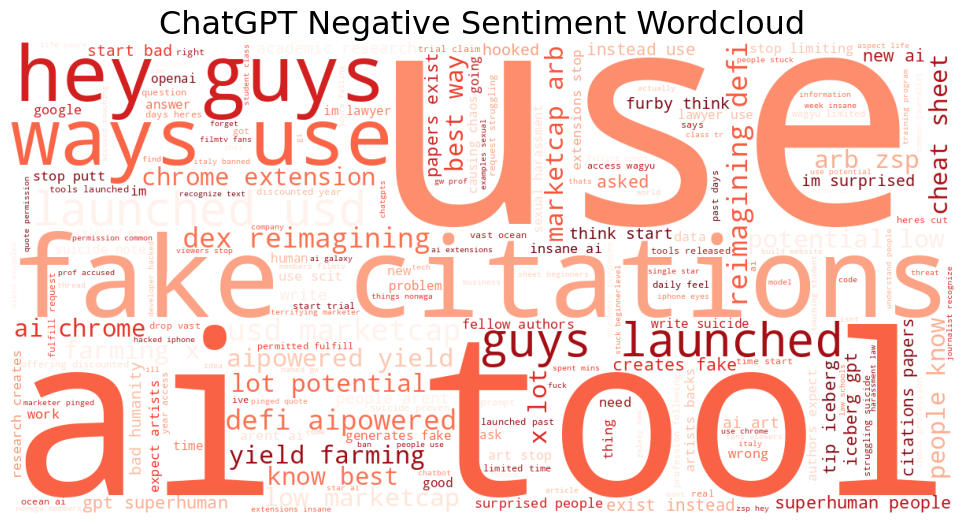

In [115]:
# Negative Sentiment Wordcloud
neg_wordcloud = WordCloud(width=1200, height=600,
            background_color='white',
            colormap="Reds",
            stopwords=STOPWORDS,
            min_font_size=10).generate(neg_docx)
plt.figure(figsize=(10,6), facecolor='white')
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.tight_layout(pad=2)
plt.title('ChatGPT Negative Sentiment Wordcloud',fontsize=23)
plt.savefig("neg_wc.png")
plt.show()

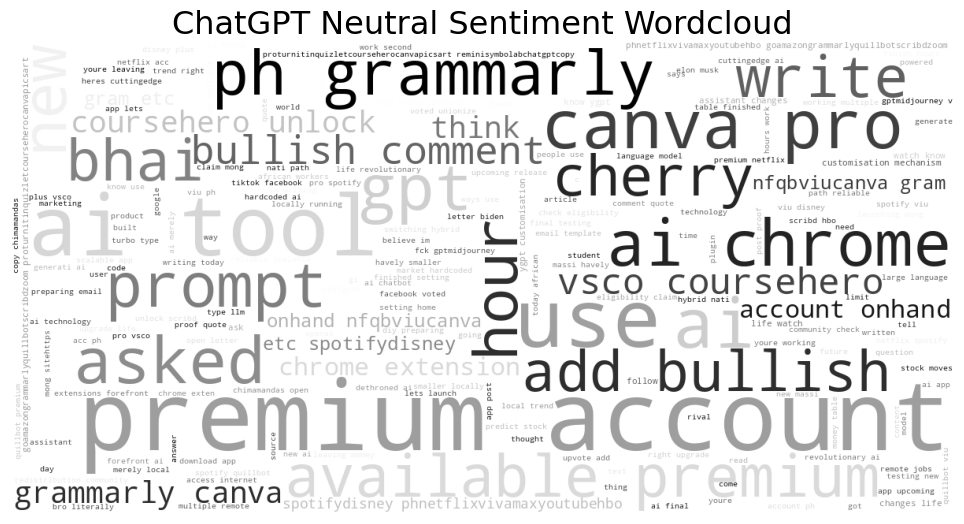

In [116]:
# Neutral Sentiment Wordcloud
neu_wordcloud = WordCloud(width=1200, height=600,
            background_color='white',
            colormap="Greys",
            stopwords=STOPWORDS,
            min_font_size=10).generate(neu_docx)
plt.figure(figsize=(10,6), facecolor='white')
plt.imshow(neu_wordcloud)
plt.axis('off')
plt.tight_layout(pad=2)
plt.title('ChatGPT Neutral Sentiment Wordcloud',fontsize=23)
plt.savefig("neu_wc.png")
plt.show()

Create a dataframe with clean tweets and compound score for feature extraction

In [117]:
chatgpt_lang_en.head()

,tweet_created,text,lang,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,original_tweet,datetime,hour,word_count,clean_tweet,sentiment,compound,comp_score
2,2023-04-03 03:59:28+00:00,RT @DarrellLerner: ChatGPT Plugins are the fastest way to get rich in 2023. \n\nI’ve created a step-by-step guide showing you how to earn $10…,en,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0,RT @DarrellLerner: ChatGPT Plugins are the fastest way to get rich in 2023. \n\nI’ve created a step-by-step guide showing you how to earn $10…,2023-04-03 03:59:28+00:00,3,24,rt chatgpt plugins are the fastest way to get rich in ive created a stepbystep guide showing you how to earn,"{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.6808}",0.6808,pos
3,2023-04-03 15:59:59+00:00,Get an intelligent chatbot for your website in minutes with Chatbase AI. Train ChatGPT on your data and let it answer any question your users have. Simply upload a document or link and add the chat widget - it's that easy!\nMake Money using AI: https://t.co/yLHEqn4w9T https://t.co/ba54JvoRsM,en,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0,Get an intelligent chatbot for your website in minutes with Chatbase AI. Train ChatGPT on your data and let it answer any question your users have. Simply upload a document or link and add the chat widget - it's that easy!\nMake Money using AI: https://t.co/yLHEqn4w9T https://t.co/ba54JvoRsM,2023-04-03 15:59:59+00:00,15,47,get an intelligent chatbot for your website in minutes with chatbase ai train chatgpt on your data and let it answer any question your users have simply upload a document or link and add the chat widget its that easymake money using ai,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.4588}",0.4588,pos
4,2023-04-03 01:59:25+00:00,"🔥Hey Guys, #ZenithSwap has launched at just $ 55,000 USD Marketcap. The ChatGPT of DEX - Reimagining DeFi with AI-Powered Yield Farming. Now at 4X. Lot of up potential at such low marketcap.🔥😇 $ARB $ZSP #Arbitrum https://t.co/9VWYtYzAJD",en,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0,"🔥Hey Guys, #ZenithSwap has launched at just $ 55,000 USD Marketcap. The ChatGPT of DEX - Reimagining DeFi with AI-Powered Yield Farming. Now at 4X. Lot of up potential at such low marketcap.🔥😇 $ARB $ZSP #Arbitrum https://t.co/9VWYtYzAJD",2023-04-03 01:59:25+00:00,1,37,hey guys has launched at just usd marketcap the chatgpt of dex reimagining defi with aipowered yield farming now at x lot of up potential at such low marketcap arb zsp,"{'neg': 0.066, 'neu': 0.886, 'pos': 0.047, 'compound': -0.1531}",-0.1531,neg
5,2023-04-03 11:59:28+00:00,RT @sinsonetwork: Now! Join #SINSO DataLand^ChatGPT #Airdrop!\n📅3.23-4.6\n📌Tasks\n①Log in to&lt;https://t.co/Hlwqa7HG40&gt;\n②Try SINSO #ChatGPT&amp; twe…,en,2286.0,982.0,20438.0,False,270.0,0.0,0.0,0.0,RT @sinsonetwork: Now! Join #SINSO DataLand^ChatGPT #Airdrop!\n📅3.23-4.6\n📌Tasks\n①Log in to&lt;https://t.co/Hlwqa7HG40&gt;\n②Try SINSO #ChatGPT&amp; twe…,2023-04-03 11:59:28+00:00,11,16,rt now join datalandchatgpt taskslog in tolttry sinso twe,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.296}",0.2960,pos
9,2023-04-03 12:59:26+00:00,"The plagiarism detector will introduce its #AI detection tool tomorrow, hoping to protect academic integrity in a post-#ChatGPT world. \n\nThe speedy launch and lack of an opt-out have #academics worried.\n\nAn important piece @liamhknox for @insidehighered \n\nhttps://t.co/pq7DB5r9An",en,4444.0,1924.0,3320.0,True,7.0,22.0,1.0,5769.0,"The plagiarism detector will introduce its #AI detection tool tomorrow, hoping to protect academic integrity in a post-#ChatGPT world. \n\nThe speedy launch and lack of an opt-out have #academics worried.\n\nAn important piece @liamhknox for @insidehighered \n\nhttps://t.co/pq7DB5r9An",2023-04-03 12:59:26+00:00,12,37,the plagiarism detector will introduce its detection tool tomorrow hoping to protect academic integrity in a post world thespeedy 

In [118]:
#Combining the results into a new DataFrame
clean_tweet_score = pd.DataFrame({'Clean Tweets': chatgpt_lang_en['clean_tweet'] , 'Compound Score': chatgpt_lang_en['comp_score'] })


In [119]:
clean_tweet_score.head(10)

,Clean Tweets,Compound Score
2,rt chatgpt plugins are the fastest way to get rich in ive created a stepbystep guide showing you how to earn,pos
3,get an intelligent chatbot for your website in minutes with chatbase ai train chatgpt on your data and let it answer any question your users have simply upload a document or link and add the chat widget its that easymake money using ai,pos
4,hey guys has launched at just usd marketcap the chatgpt of dex reimagining defi with aipowered yield farming now at x lot of up potential at such low marketcap arb zsp,neg
5,rt now join datalandchatgpt taskslog in tolttry sinso twe,pos
9,the plagiarism detector will introduce its detection tool tomorrow hoping to protect academic integrity in a post world thespeedy launch and lack of an optout have worried an important piece for,pos
10,germany could follow in italys footsteps by blocking chatgpt over data security concerns,neg
11,rt chatgpt gt fud this guy ai knows too much,neu
15,rt these guys asked chatgpt how to win a valorant game and got their opponent to surrender lmao,pos
16,rt i hooked up chatgpt to a furby and i think this may be the start of something bad for humanity,neg
17,rt i asked the new chatgpt browsing extension to find me some money within a minute i had on the way to my bank account,neu
